<a href="https://colab.research.google.com/github/Sneha-P-Karunakaran/Deep-Learning-Projects/blob/main/Brain_tumour_Task(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.layers import Conv2D,MaxPooling2D,Flatten,BatchNormalization
from keras.utils import to_categorical
from PIL import Image
import os

In [ ]:
Encoder=OneHotEncoder()
Encoder.fit([[0],[1]])

OneHotEncoder()

In [ ]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk("/content/drive/MyDrive/yes"):
  for file in f:
    if".jpg"in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if (img.shape==(128,128,3)):
    data.append(img)
    result.append(Encoder.transform([[0]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk("/content/drive/MyDrive/No"):
  for file in f:
    if".jpg"in file:
      paths.append(os.path.join(r,file))
for path in paths:
  img=Image.open(path)
  img=img.resize((128,128))
  img=np.array(img)
  if (img.shape==(128,128,3)):
    data.append(img)
    result.append(Encoder.transform([[1]]).toarray())

In [ ]:
data=np.array(data)
data.shape

(11, 128, 128, 3)

In [ ]:
result=np.array(result)
result.reshape(11,2)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

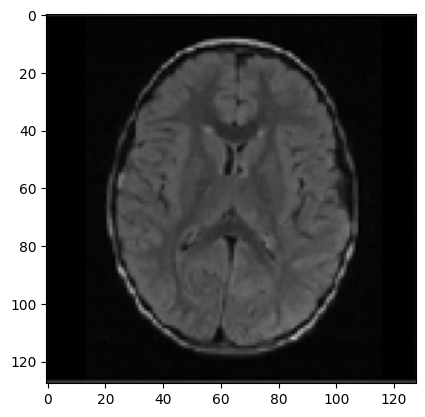

In [ ]:
plt.imshow(data[6])

In [ ]:
#splitting the data and results
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=.2,shuffle=True,random_state=2)
ytrain.shape

(8, 1, 2)

In [ ]:
#input layer
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding="same"))
model.add(Conv2D(32,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#hidden layer
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#flatten layer
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(.5))

#output layer
model.add(Dense(2,activation="softmax"))

#summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_3 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
ytrain = ytrain.reshape((-1, 2))
ytest = ytest.reshape((-1, 2))

In [ ]:
#compiling
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
ytrain.shape

(8, 2)

In [ ]:
ytest.shape

(3, 2)

In [ ]:
history=model.fit(xtrain,ytrain,verbose=1,epochs=30,batch_size=64,validation_data=(xtest,ytest))

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 0.8601 - accuracy: 0.7500 - val_loss: 11.5813 - val_accuracy: 0.6667
Epoch 2/30
1/1 [==============================] - 1s 584ms/step - loss: 5.1032 - accuracy: 1.0000 - val_loss: 10.8121 - val_accuracy: 0.6667
Epoch 3/30
1/1 [==============================] - 1s 631ms/step - loss: 1.7633 - accuracy: 0.8750 - val_loss: 6.8294 - val_accuracy: 0.6667
Epoch 4/30
1/1 [==============================] - 1s 635ms/step - loss: 1.6962 - accuracy: 1.0000 - val_loss: 9.1460 - val_accuracy: 0.6667
Epoch 5/30
1/1 [==============================] - 1s 649ms/step - loss: 0.0396 - accuracy: 1.0000 - val_loss: 9.1741 - val_accuracy: 0.6667
Epoch 6/30
1/1 [==============================] - 1s 613ms/step - loss: 1.1999 - accuracy: 0.8750 - val_loss: 7.0668 - val_accuracy: 0.6667
Epoch 7/30
1/1 [==============================] - 1s 599ms/step - loss: 9.4945e-05 - accuracy: 1.0000 - val_loss: 5.5329 - val_accuracy: 0.6667
Epoch 8/30
1/1 [=

In [ ]:
#evaluation
loss,accuracy=model.evaluate(xtest,ytest,batch_size=64)
print(accuracy*100)

1/1 [==============================] - 0s 68ms/step - loss: 20.8466 - accuracy: 0.6667
66.66666865348816


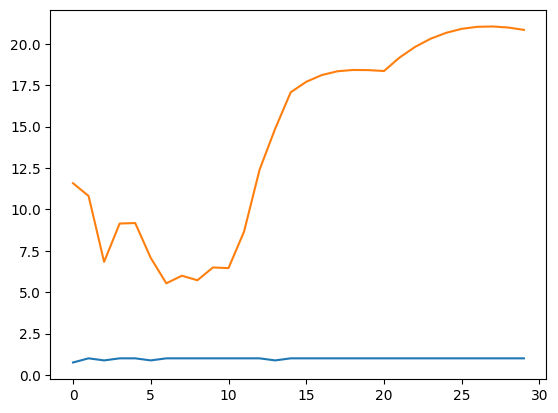

In [ ]:
#plotting
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_loss"])
plt.show()

In [ ]:
def group(number):
  if number==0:
    return "Tumour infected Brain"
  else:
    return "Not an tumour infected Brain"

100.0% This is Tumour infected Brain


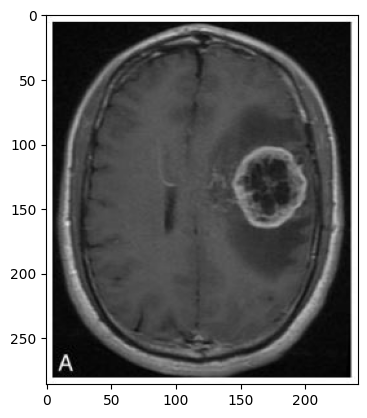

In [ ]:
#testing the image is tumour infected or not
img=Image.open("/content/drive/MyDrive/yes/Y89.JPG")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)

print(str(res[0][classification]*100)+"% This is "+group(classification))